<a href="https://colab.research.google.com/github/GabrielFFranco/Mackenzie_IA_Deep_Learning/blob/main/Tarefa_de_Aprofundamento_Trilha_6_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de Dogras usando Pytorch**

### **Aluno: Gabriel Ferreira Franco**


O dataset escolhido para atividade foi o mesmo utilizado na atividade de aprofundamento da trilha 4, ele determina qual tipo de medicamento o paciente deve tomar baseado na sua idade, sexo, pressão arterial, nivel de colesterol e o nivel de sódio e potassio no sangue.

Dataset disponível em: https://www.kaggle.com/prathamtripathi/drug-classification

Código disponível em: https://github.com/GabrielFFranco/Mackenzie_IA_Deep_Learning/blob/main/Tarefa_de_Aprofundamento_Trilha_6_Deep_Learning.ipynb

In [286]:
#Fazendo as importações das bibliotecas.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
%matplotlib inline

In [287]:
#Funções auxiliar para exibir os resultados do teste

def plot_history(loss_list,  accuracy_list):
  fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 8), sharex=True)

  ax1.plot(accuracy_list)
  ax1.set_ylabel("validation accuracy")
  ax2.plot(loss_list)
  ax2.set_ylabel("validation loss")
  ax2.set_xlabel("epochs")
  plt.show()

  return

def print_results(y_test, y_pred):
  print('Matriz de Confusão: \n' , confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('Acuracidade: ' , accuracy_score(y_test, y_pred))
  return

In [288]:
#Carregando dataset e exibindo.
df = pd.read_csv("https://raw.githubusercontent.com/Rogerio-mack/work/main/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [289]:
#Avaliando o Modelo
print("Valores NaN:")
print(df.isna().sum())

print("\n\nValores nulos:")
print(df.isnull().sum())

Valores NaN:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


Valores nulos:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [290]:
#Fazendo a discretização das colunas "Sex", "BP", "Cholesterol"
coluna = ["BP", "Cholesterol"]
for col in coluna:
  dummies = pd.get_dummies(df[col], prefix=col)
  df = pd.concat([df, dummies], axis = 1)
  df.drop(columns=[col], inplace=True)
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df.head()

,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,0,25.355,DrugY,1,0,0,1,0
1,47,1,13.093,drugC,0,1,0,1,0
2,47,1,10.114,drugC,0,1,0,1,0
3,28,0,7.798,drugX,0,0,1,1,0
4,61,0,18.043,DrugY,0,1,0,1,0


In [291]:
#Padronizando os dados
scale = StandardScaler()
X = scale.fit_transform(df.drop(columns=["Drug"]))
print(X)

[[-1.29159102 -1.040833    1.28652212 ... -0.64686916  0.97043679
  -0.97043679]
 [ 0.16269866  0.96076892 -0.4151454  ... -0.64686916  0.97043679
  -0.97043679]
 [ 0.16269866  0.96076892 -0.82855818 ... -0.64686916  0.97043679
  -0.97043679]
 ...
 [ 0.46567567  0.96076892 -0.85908883 ...  1.54590766  0.97043679
  -0.97043679]
 [-1.29159102  0.96076892 -0.28650033 ...  1.54590766 -1.03046381
   1.03046381]
 [-0.26146916 -1.040833   -0.6571702  ... -0.64686916 -1.03046381
   1.03046381]]


In [292]:
#Fazendo Hot Encode dos alvos
y = pd.get_dummies(df["Drug"], prefix="Drug")
y = y.to_numpy()

In [293]:
#Dividindo o dataset entre o conjunto de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#Convertendo elementos para tensores do Pytorch
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).float()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).float()

In [294]:
#Definindo modelo
class Model(nn.Module):
    def __init__(self, input_dim, flag):
        super(Model, self).__init__()
        #Caso a variavel flag seja igual a 1, o modelo tera Dropout
        if flag == 1:
          self.layers = nn.Sequential(
            nn.Linear(input_dim, 15),
            nn.Dropout(p=0.1),
            nn.Linear(15, 10),
            nn.Dropout(p=0.1),
            nn.Linear(10, 5)
          )
        else:
          self.layers = nn.Sequential(
            nn.Linear(input_dim, 15),
            nn.Linear(15, 10),
            nn.Linear(10, 5)
          )
        
    def forward(self, x):
        x = self.layers(x)
        return x

Model(
  (layers): Sequential(
    (0): Linear(in_features=8, out_features=15, bias=True)
    (1): Linear(in_features=15, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=5, bias=True)
  )
)


100%|██████████| 200/200 [00:00<00:00, 945.09it/s] 


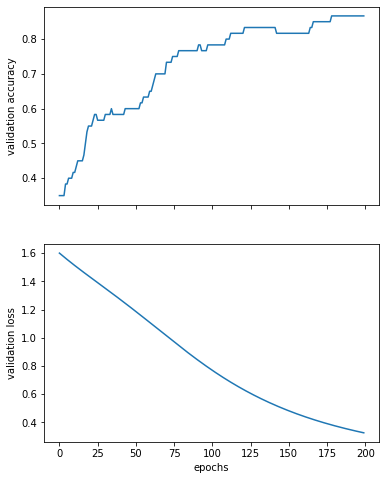

Matriz de Confusão: 
 [[27  0  0  0  0]
 [ 1  6  3  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  4  0]
 [ 3  0  0  0 12]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92        27
           1       1.00      0.60      0.75        10
           2       0.50      1.00      0.67         3
           3       1.00      0.80      0.89         5
           4       1.00      0.80      0.89        15

    accuracy                           0.87        60
   macro avg       0.87      0.84      0.82        60
weighted avg       0.90      0.87      0.87        60

Acuracidade:  0.8666666666666667


In [295]:
#Inicializando modelo
model = Model(X_train.shape[1], flag=0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
print(model)

#Treinando modelo sem Dropout

EPOCHS  = 200

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == torch.argmax(y_test, dim=1)).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

plot_history(loss_list,  accuracy_list) 
print_results(torch.argmax(y_pred, dim=1), torch.argmax(y_test, dim=1))

Model(
  (layers): Sequential(
    (0): Linear(in_features=8, out_features=15, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): Linear(in_features=15, out_features=10, bias=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=10, out_features=5, bias=True)
  )
)


100%|██████████| 200/200 [00:00<00:00, 832.83it/s]


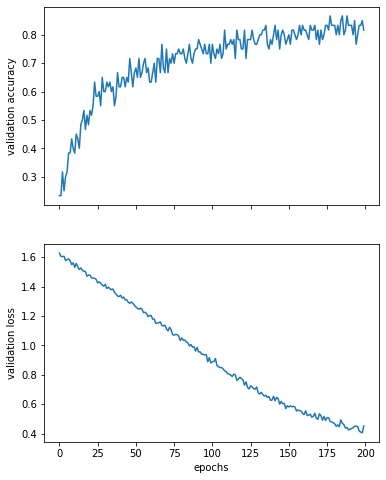

Matriz de Confusão: 
 [[28  0  1  0  0]
 [ 1  6  5  0  0]
 [ 0  0  0  0  0]
 [ 1  0  0  3  0]
 [ 2  0  0  1 12]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       1.00      0.50      0.67        12
           2       0.00      0.00      0.00         0
           3       0.75      0.75      0.75         4
           4       1.00      0.80      0.89        15

    accuracy                           0.82        60
   macro avg       0.72      0.60      0.64        60
weighted avg       0.92      0.82      0.85        60

Acuracidade:  0.8166666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [296]:
#Inicializando modelo
model = Model(X_train.shape[1], flag=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
print(model)

#Treinando modelo sem Dropout

EPOCHS  = 200

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == torch.argmax(y_test, dim=1)).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

plot_history(loss_list,  accuracy_list) 
print_results(torch.argmax(y_pred, dim=1), torch.argmax(y_test, dim=1))

# **Conclusão**
Como o dataset escolhido é pequeno, o o método de Dropout o deixa ainda menor, concluo que não foi necessario a utilização dele, obtendo uma acurácia maior quando ele não esta presente. Além disso, o Dropout resultou com em erros na hora de calcular as medidas de desempenho.